In [66]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
import numpy as np
from random import random

In [67]:
def generate_dataset(num_samples, test_size=0.33):
    x = np.array([[random()/2 for _ in range(2)] for _ in range(num_samples)])
    y = np.array([[i[0] + i[1]] for i in x])

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size)
    return x_train, x_test, y_train, y_test

In [68]:
# create a dataset with 2000 samples
x_train, x_test, y_train, y_test = generate_dataset(5000, 0.3)

# build model with 3 layers: 2 -> 5 -> 1
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(5, input_dim=2, activation="sigmoid"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# compile model
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)
model.compile(optimizer=optimizer, loss='mse')

# train model
model.fit(x_train, y_train, epochs=100)

# evaluate model on test set
print("\nEvaluation on the test set:")
model.evaluate(x_test,  y_test, verbose=2)

# get predictions
data = np.array([[0.1, 0.2], [0.2, 0.2]])
predictions = model.predict(data)

# print predictions
print("\nPredictions:")
for d, p in zip(data, predictions):
    print("{} + {} = {}".format(d[0], d[1], p[0]))

Epoch 1/100
110/110 [==============================] - 0s 858us/step - loss: 0.0401
Epoch 2/100
110/110 [==============================] - 0s 815us/step - loss: 0.0381
Epoch 3/100
110/110 [==============================] - 0s 1ms/step - loss: 0.0377
Epoch 4/100
110/110 [==============================] - 0s 1ms/step - loss: 0.0373
Epoch 5/100
110/110 [==============================] - 0s 826us/step - loss: 0.0369
Epoch 6/100
110/110 [==============================] - 0s 780us/step - loss: 0.0364
Epoch 7/100
110/110 [==============================] - 0s 807us/step - loss: 0.0360
Epoch 8/100
110/110 [==============================] - 0s 833us/step - loss: 0.0356
Epoch 9/100
110/110 [==============================] - 0s 854us/step - loss: 0.0351
Epoch 10/100
110/110 [==============================] - 0s 820us/step - loss: 0.0345
Epoch 11/100
110/110 [==============================] - 0s 826us/step - loss: 0.0340
Epoch 12/100
110/110 [==============================] - 0s 817us/step - loss: 

110/110 [==============================] - 0s 2ms/step - loss: 5.6098e-04
Epoch 98/100
110/110 [==============================] - 0s 2ms/step - loss: 5.4763e-04
Epoch 99/100
110/110 [==============================] - 0s 1ms/step - loss: 5.3527e-04
Epoch 100/100
110/110 [==============================] - 0s 2ms/step - loss: 5.2385e-04

Evaluation on the test set:
47/47 - 0s - loss: 5.8155e-04

Predictions:
0.1 + 0.2 = 0.2971118688583374
0.2 + 0.2 = 0.39569488167762756


In [69]:
import librosa, librosa.display
import matplotlib.pyplot as plt

(15, 433)


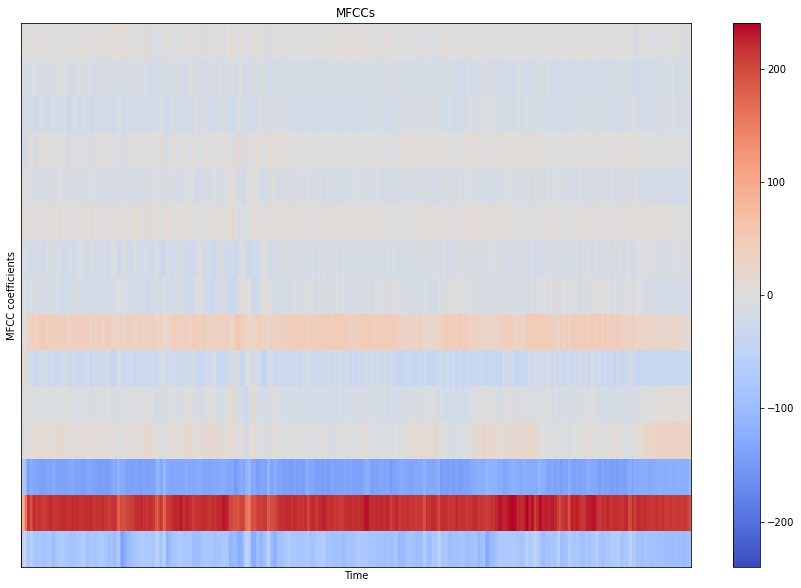

In [75]:
file = "/Users/rezajebeli97/Desktop/1.wav"

# load audio file with Librosa
signal, sample_rate = librosa.load(file, sr=22050)


# WAVEFORM
# display waveform
# FIG_SIZE = (15,10)
# plt.figure(figsize=FIG_SIZE)
# librosa.display.waveplot(signal, sample_rate, alpha=0.4)
# plt.xlabel("Time (s)")
# plt.ylabel("Amplitude")
# plt.title("Waveform")


# FFT -> power spectrum
# perform Fourier transform
fft = np.fft.fft(signal)

# calculate abs values on complex numbers to get magnitude
spectrum = np.abs(fft)


# create frequency variable
f = np.linspace(0, sample_rate, len(spectrum))

# take half of the spectrum and frequency
left_spectrum = spectrum[:int(len(spectrum)/2)]
left_f = f[:int(len(spectrum)/2)]

# # plot spectrum
# plt.figure(figsize=FIG_SIZE)
# plt.plot(left_f, left_spectrum, alpha=0.4)
# plt.xlabel("Frequency")
# plt.ylabel("Magnitude")
# plt.title("Power spectrum")






# STFT -> spectrogram
hop_length = 512 # in num. of samples
n_fft = 2048 # window in num. of samples

# perform stft
stft = librosa.stft(signal, n_fft=n_fft, hop_length=hop_length)

# calculate abs values on complex numbers to get magnitude
spectrogram = np.abs(stft)

# display spectrogram
# plt.figure(figsize=FIG_SIZE)
# librosa.display.specshow(spectrogram, sr=sample_rate, hop_length=hop_length)
# plt.xlabel("Time")
# plt.ylabel("Frequency")
# plt.colorbar()
# plt.title("Spectrogram")

# apply logarithm to cast amplitude to Decibels
log_spectrogram = librosa.amplitude_to_db(spectrogram)

# plt.figure(figsize=FIG_SIZE)
# librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length)
# plt.xlabel("Time")
# plt.ylabel("Frequency")
# plt.colorbar(format="%+2.0f dB")
# plt.title("Spectrogram (dB)")


# MFCCs
# extract 13 MFCCs
MFCCs = librosa.feature.mfcc(signal, sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=15)
print(np.shape(MFCCs))
# display MFCCs
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(MFCCs, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.title("MFCCs")

# show plots
plt.show()


In [80]:
import json
import os
import math
import librosa

In [107]:
DATASET_PATH = "/Users/rezajebeli97/Desktop/test"
JSON_PATH = "/Users/rezajebeli97/Desktop/data_10.json"
SAMPLE_RATE = 8000    #------------------------------------------------------------?22050
TRACK_DURATION = 10 # measured in seconds      #---------------------------------?
SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION


def save_mfcc(dataset_path, json_path, num_mfcc=13, n_fft=2048, hop_length=512, num_segments=5):
    """Extracts MFCCs from music dataset and saves them into a json file along witgh genre labels.
        :param dataset_path (str): Path to dataset
        :param json_path (str): Path to json file used to save MFCCs
        :param num_mfcc (int): Number of coefficients to extract
        :param n_fft (int): Interval we consider to apply FFT. Measured in # of samples
        :param hop_length (int): Sliding window for FFT. Measured in # of samples
        :param: num_segments (int): Number of segments we want to divide sample tracks into
        :return:
        """

    # dictionary to store mapping, labels, and MFCCs
    data = {
        "mapping": [],
        "labels": [],
        "mfcc": []
    }

    samples_per_segment = int(SAMPLES_PER_TRACK / num_segments)
    num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / hop_length)

    # loop through all genre sub-folder
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):

        # ensure we're processing a genre sub-folder level
        if dirpath is not dataset_path:

            # save genre label (i.e., sub-folder name) in the mapping
            semantic_label = dirpath.split("/")[-1]
            if (semantic_label == '.DS_Store'):
                continue
            data["mapping"].append(semantic_label)
            print("\nProcessing: {}".format(semantic_label))

            # process all audio files in genre sub-dir
            for f in filenames:
                if(f == ".DS_Store"):
                    continue
                print(f)
		# load audio file
                file_path = os.path.join(dirpath, f)
                signal, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE)

                # process all segments of audio file
                for d in range(num_segments):

                    # calculate start and finish sample for current segment
                    start = samples_per_segment * d
                    finish = start + samples_per_segment

                    # extract mfcc
                    mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
                    mfcc = mfcc.T

                    # store only mfcc feature with expected number of vectors
                    if len(mfcc) == num_mfcc_vectors_per_segment:
                        data["mfcc"].append(mfcc.tolist())
                        data["labels"].append(i-1)
                        print("{}, segment:{}".format(file_path, d+1))

    # save MFCCs to json file
    with open(json_path, "w") as fp:
        json.dump(data, fp, indent=4)
        
        
if __name__ == "__main__":
    save_mfcc(DATASET_PATH, JSON_PATH, num_segments=3)


Processing: test1

Processing: Emergency
103.wav
/Users/rezajebeli97/Desktop/test/Emergency/103.wav, segment:1
/Users/rezajebeli97/Desktop/test/Emergency/103.wav, segment:2
117.wav
/Users/rezajebeli97/Desktop/test/Emergency/117.wav, segment:1
/Users/rezajebeli97/Desktop/test/Emergency/117.wav, segment:2
/Users/rezajebeli97/Desktop/test/Emergency/117.wav, segment:3
116.wav
/Users/rezajebeli97/Desktop/test/Emergency/116.wav, segment:1
/Users/rezajebeli97/Desktop/test/Emergency/116.wav, segment:2
/Users/rezajebeli97/Desktop/test/Emergency/116.wav, segment:3
102.wav
/Users/rezajebeli97/Desktop/test/Emergency/102.wav, segment:1
/Users/rezajebeli97/Desktop/test/Emergency/102.wav, segment:2
17.wav
/Users/rezajebeli97/Desktop/test/Emergency/17.wav, segment:1
/Users/rezajebeli97/Desktop/test/Emergency/17.wav, segment:2
15.wav
/Users/rezajebeli97/Desktop/test/Emergency/15.wav, segment:1
/Users/rezajebeli97/Desktop/test/Emergency/15.wav, segment:2
/Users/rezajebeli97/Desktop/test/Emergency/15.wa

/Users/rezajebeli97/Desktop/test/Emergency/95.wav, segment:1
/Users/rezajebeli97/Desktop/test/Emergency/95.wav, segment:2
42.wav
/Users/rezajebeli97/Desktop/test/Emergency/42.wav, segment:1
/Users/rezajebeli97/Desktop/test/Emergency/42.wav, segment:2
4.wav
/Users/rezajebeli97/Desktop/test/Emergency/4.wav, segment:1
/Users/rezajebeli97/Desktop/test/Emergency/4.wav, segment:2
/Users/rezajebeli97/Desktop/test/Emergency/4.wav, segment:3
56.wav
/Users/rezajebeli97/Desktop/test/Emergency/56.wav, segment:1
/Users/rezajebeli97/Desktop/test/Emergency/56.wav, segment:2
/Users/rezajebeli97/Desktop/test/Emergency/56.wav, segment:3
85.wav
/Users/rezajebeli97/Desktop/test/Emergency/85.wav, segment:1
/Users/rezajebeli97/Desktop/test/Emergency/85.wav, segment:2
84.wav
/Users/rezajebeli97/Desktop/test/Emergency/84.wav, segment:1
/Users/rezajebeli97/Desktop/test/Emergency/84.wav, segment:2
/Users/rezajebeli97/Desktop/test/Emergency/84.wav, segment:3
90.wav
/Users/rezajebeli97/Desktop/test/Emergency/90.w

In [105]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras

In [106]:
# path to json file that stores MFCCs and genre labels for each processed segment
DATA_PATH = JSON_PATH

def load_data(data_path):
    """Loads training dataset from json file.
        :param data_path (str): Path to json file containing data
        :return X (ndarray): Inputs
        :return y (ndarray): Targets
    """

    with open(data_path, "r") as fp:
        data = json.load(fp)

    # convert lists to numpy arrays
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])

    print("Data succesfully loaded!")

    return  X, y


if __name__ == "__main__":

    # load data
    X, y = load_data(DATA_PATH)

    # create train/test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

    # build network topology
    model = keras.Sequential([

        # input layer
        keras.layers.Flatten(input_shape=(X.shape[1], X.shape[2])),

        # 1st dense layer
        keras.layers.Dense(512, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.Dropout(0.3),
        
        # 2nd dense layer
        keras.layers.Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.Dropout(0.3),
        
        # 3rd dense layer
        keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.Dropout(0.3),
        
        # output layer
        keras.layers.Dense(2, activation='softmax')
    ])

    # compile model
    optimiser = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=optimiser,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    model.summary()

    # train model
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=100)

Data succesfully loaded!
Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 689)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 512)               353280    
_________________________________________________________________
dropout_9 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_43 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_10 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_44 (Dense)             (None, 64)                16448     
_________________________________________________________________
dropout_11 (Dropout)        

11/11 [==============================] - 0s 9ms/step - loss: 2.4300 - accuracy: 0.7253 - val_loss: 1.5792 - val_accuracy: 0.7357
Epoch 49/100
11/11 [==============================] - 0s 8ms/step - loss: 2.2797 - accuracy: 0.7407 - val_loss: 1.5708 - val_accuracy: 0.7286
Epoch 50/100
11/11 [==============================] - 0s 8ms/step - loss: 2.2075 - accuracy: 0.7593 - val_loss: 1.5559 - val_accuracy: 0.7286
Epoch 51/100
11/11 [==============================] - 0s 8ms/step - loss: 2.7280 - accuracy: 0.7222 - val_loss: 1.5756 - val_accuracy: 0.7357
Epoch 52/100
11/11 [==============================] - 0s 9ms/step - loss: 2.7299 - accuracy: 0.7284 - val_loss: 1.5985 - val_accuracy: 0.7143
Epoch 53/100
11/11 [==============================] - 0s 10ms/step - loss: 2.4556 - accuracy: 0.7099 - val_loss: 1.6313 - val_accuracy: 0.7214
Epoch 54/100
11/11 [==============================] - 0s 8ms/step - loss: 2.2701 - accuracy: 0.7377 - val_loss: 1.6339 - val_accuracy: 0.7357
Epoch 55/100
11/11